# OPTIMIZACIÓN WORD VECTORS
También conocidos como word embeddings. Un tipo de representación de palabras que ha ayudado en gran
medida a la aplicación del deep learning en problemas de lenguaje
natural.

Idea clave para construir word vectors: El significado de una palabra viene dado por las palabras que aparecen
frecuentemente junto a ella.



## 1. Introducción

Podemos extraer el significado de una palabra estadísticamente a
partir del **contexto** en el que la palabra está presente.
El contexto de una palabra será el conjunto de palabras que aparecen
cerca de ésta, dentro de un rango de tamaño determinado (window o
ventana)

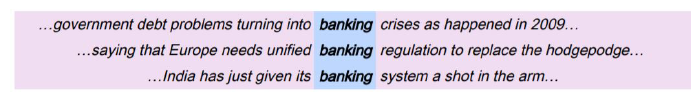

A partir de una gran cantidad de texto, obtendremos un vector denso
para cada palabra que sea similar a los vectores de palabras que
aparecen en contextos similares.

Aparecer en contextos similares significa que las palabras guardan
una relación semántica.
Los vectores obtenidos serán los word vectors, también conocidos
como word embeddings o word representations.
El algoritmo que utilizaremos para construir los word vectors es
conocido como word2vec y data de 2013.
La idea es utilizar un corpus grande de texto (por ejemplo, todo el
texto en un idioma de la Wikipedia), que es tratado estadísticamente
para obtener los vectores de cada palabra.
El output del algoritmo es un vector por cada palabra en el
vocabulario.
Existen otras alternativas para calcular word vectors. Una de las más
famosas es GloVe.

## 2. Ejemplo práctico

Es un problema de clasificación binario de textos mediante Word Vectors en el que trataremos de predecir si una review de IMDB acerca de una película es negativa o positiva. Se utilizará Keras como librería interna de TensorFlow.
Vamos a tener un texto que no es más ni menos que una secuencia de palabras y cada palabra va a tener un word embeding asociado que va a contener características semanticas o sintacticas.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from prettytable import PrettyTable
from keras.callbacks import EarlyStopping




#Las revisiones han sido preprocesadas, y cada revisión está codificada como una lista de índices de palabras (enteros). 
#Por conveniencia, las palabras se indexan por frecuencia general en el conjunto de datos, de modo que, por ejemplo, 
#el entero "3" codifica la tercera palabra más frecuente en los datos. 

imdb = keras.datasets.imdb

#Reducimos el número de palabras y escogemos las 10 mil palabras más comunes. Ahorras en features modelo más pequeño y manejables.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print ("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))


Training entries: 25000, labels: 25000


In [ ]:
# Ya nos hace la conversión. Cada índice esta asociado a un word vector. índice a partir del cual se leen los word embedding asociados.
#14 es una palabra, 5 es una palabra.
print(train_data[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [ ]:
# Cada review tiene un tamaño distinto
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
#
len(train_data[0]), len(train_data[1])

(218, 189)

In [ ]:
#Un diccionario que asigna palabras a un índice entero. Ejemplo la palabra movie es el índice 5
word_index = imdb.get_word_index()

#Los primeros índices son reservados. 
#Asignamos un valor para inicio de cadena, padding. A nuestro word index original le estamos añadiendo estos tokens especiales

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0 
word_index["<START>"] = 1 
word_index["<UNK>"] = 2 #No conocido
word_index["<UNUSED>"] = 3

#Si sabemos un índice podemos saber la palabra. 

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
    return ''.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
#No hay signos de puntación
#Vemos el token START, son muy importante para redes recurrentes ya que pueden extraer significado a partir de esos tokens, recordar el problema de la memoria de las RNN 
# Las palabras que hemos perdido UNK, al hacer la selección de num_words.
decode_review(train_data[1])

"<START>bighairbigboobsbadmusicandagiantsafetypinthesearethewordstobestdescribethisterriblemovieilovecheesyhorrormoviesandi'veseenhundredsbutthishadgottobeonoftheworstevermadetheplotispaperthinandridiculoustheactingisanabominationthescriptiscompletelylaughablethebestistheendshowdownwiththecopandhowheworkedoutwhothekillerisit'sjustsodamnterriblywrittentheclothesaresickeningandfunnyinequal<UNK>thehairisbiglotsofboobs<UNK>menwearthosecut<UNK>shirtsthatshowofftheir<UNK>sickeningthatmenactuallyworethemandthemusicisjust<UNK>trashthatplaysoverandoveragaininalmosteveryscenethereistrashymusicboobsand<UNK>takingawaybodiesandthegymstilldoesn'tclosefor<UNK>alljokingasidethisisatrulybadfilmwhoseonlycharmistolookbackonthedisasterthatwasthe80'sandhaveagoodoldlaughathowbadeverythingwasbackthen"

In [ ]:
decode_review(train_data[0])

"<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittleboy'sthatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [ ]:
#Necesitamos la misma longitud para las secuencias de entrada, por lo que vamos a añadir "padding"
train_data = keras.preprocessing. sequence.pad_sequences(train_data, 
                                                        value=word_index["<PAD>"], 
                                                        padding='post', 
                                                        maxlen=256)

test_data = keras.preprocessing. sequence.pad_sequences(test_data, 
                                                        value=word_index["<PAD>"], 
                                                        padding='post', 
                                                        maxlen=256)

In [ ]:
len(train_data[0]), len(train_data[2])

(256, 256)

In [ ]:
decode_review(train_data[0])

"<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittleboy'sthatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PA

In [ ]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [ ]:
#la forma de entrada es el recuento de vocabulario utilizado para las reseñas de películas
vocab_size = 10000

model = keras.Sequential()
#una capa de embedding de los 10000 que tenemos en el vocabulario con un tamaño de 16. 
#Por cada elemento de entrada nos de un word embedding de 16 elementos. 
#256 vectores de 16 elementos 

model.add(keras.layers.Embedding(vocab_size, 16)) 
#Como son muchos elementos vamos a crear la medio de los word_embeddings. Por cada palabra tendriamos un vector de 16 elementos, seria un número muy grande para la siguiente capa.
#Ojo perdemos la secuencia de las palabras.
model.add(keras.layers.GlobalAveragePooling1D())
#Ahora si, una capa densa con relu
model.add(keras.layers.Dense(16, activation=tf.nn.relu)) # Nuestra ya conocida capa densa

#Una última capa que tiene 1 elemento. La sigmoid se identifica más con una probabilidad.
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_26  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_91 (Dense)            (None, 16)                272       
                                                                 
 dense_92 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', 
             loss='binary_crossentropy', #la misma función de pérdida que softmax pero para problemas de dos clases
             metrics=['accuracy'])

In [ ]:

x_val=train_data[:10000] #datos de validación 
partial_x_train = train_data[10000:] 

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
Parada_Temprana = EarlyStopping(monitor='val_accuracy', mode='max', patience = 2, verbose=1)


history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40, 
                   batch_size=512, 
                   validation_data=(x_val, y_val),
                   verbose=1,
                   callbacks = [Parada_Temprana])

Epoch 1/40
30/30 [==============================] - 2s 27ms/step - loss: 0.6914 - accuracy: 0.5821 - val_loss: 0.6884 - val_accuracy: 0.7015
Epoch 2/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6831 - accuracy: 0.7280 - val_loss: 0.6768 - val_accuracy: 0.6999
Epoch 3/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6659 - accuracy: 0.7512 - val_loss: 0.6559 - val_accuracy: 0.7512
Epoch 4/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6376 - accuracy: 0.7721 - val_loss: 0.6246 - val_accuracy: 0.7758
Epoch 5/40
30/30 [==============================] - 1s 21ms/step - loss: 0.5987 - accuracy: 0.7939 - val_loss: 0.5850 - val_accuracy: 0.7778
Epoch 6/40
30/30 [==============================] - 1s 23ms/step - loss: 0.5523 - accuracy: 0.8206 - val_loss: 0.5413 - val_accuracy: 0.8038
Epoch 7/40
30/30 [==============================] - 1s 21ms/step - loss: 0.5028 - accuracy: 0.8397 - val_loss: 0.4964 - val_accuracy: 0.8279
Epoch 8/40
30

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3065 - accuracy: 0.8745
[0.30647534132003784, 0.8744800090789795]


In [ ]:
history_dict = history.history #A partir del objeto history lo guardamos para graficarlo
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict['loss']

[0.691399097442627,
 0.6831032037734985,
 0.6658585071563721,
 0.6376296281814575,
 0.5987125039100647,
 0.5523187518119812,
 0.5028377175331116,
 0.45421862602233887,
 0.4109231233596802,
 0.3736855983734131,
 0.34289512038230896,
 0.3171691298484802,
 0.294772207736969,
 0.27649474143981934,
 0.2595170736312866,
 0.24481536448001862,
 0.23162686824798584,
 0.21936121582984924,
 0.20816735923290253,
 0.1981625258922577,
 0.18874645233154297,
 0.17977872490882874,
 0.17181925475597382,
 0.16424526274204254,
 0.15681153535842896,
 0.15019720792770386,
 0.143727108836174,
 0.13773220777511597]

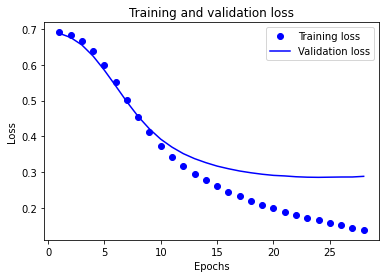

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

#bo is for blue dot
plt.plot(epochs, loss, 'bo', label='Training loss')
#b is for solid blue line
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

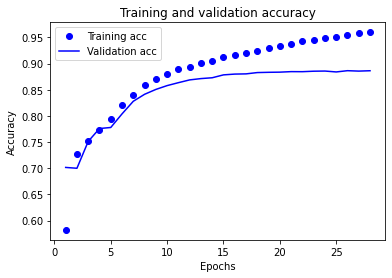

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

#bo is for blue dot
plt.plot(epochs, acc, 'bo', label='Training acc')
#b is for solid blue line
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Práctica 

Vamos a realizar 3 experimentos, como ya sabemos en problemas de aprendizaje profundo existen infinitas soluciones. Los 3 experimentos los vamos a comparar con el ejericios práctico que acabamos de realizar, para esta labor nos vamos a apoyar en la siguiente tabla. Donde el desempeño a analizar es el Test Acurracy

In [ ]:
acurracyExp0=results[1]
myTable = PrettyTable(["Experimento", " Test Accuracy"])
myTable.add_row(["0", "{0:.5f}".format(acurracyExp0)])
print(myTable)


+-------------+----------------+
| Experimento |  Test Accuracy |
+-------------+----------------+
|      0      |    0.87448     |
+-------------+----------------+


### Laboratorio 1 - Aumentar el número de palabras comunes


#### Conclusión


### Laboratorio 2 - Quitar la capa GlobalAveragePooling1D


#### Conclusión


### Laboratorio 3 - Añadir capas Dense


#### Conclusión
